<a href="https://colab.research.google.com/github/BU-BME-DataSci-ML/Spring-2023/blob/main/Homework1%5CHomework1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries that we will be using for analysis

Notes:

Distributions.  Normal distribution.  Central limit theorem.  All gaussians are the same shape but have different means and variances

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Load data

In [ ]:
from numpy import genfromtxt
HeightsAndWeights = genfromtxt('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/SOCR-HeightWeight.csv', delimiter=',')


Lets plot some things that allow us to get a sense of our data

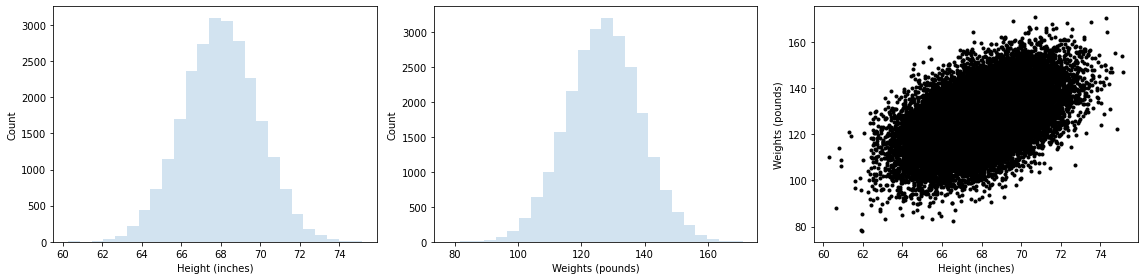

In [ ]:
heights = HeightsAndWeights[1:,1]
weights = HeightsAndWeights[1:,2]

meanHeight = np.mean(heights)
stdHeight = np.std(heights, ddof=1)

fig, ax = plt.subplots(1, 3)
ax[0].hist(heights, density=False, bins = 25, histtype='stepfilled', alpha=0.2)
ax[1].hist(weights, density=False, bins = 25, histtype='stepfilled', alpha=0.2)
ax[2].plot(heights, weights, 'k.')

ax[0].set(xlabel='Height (inches)')
ax[0].set(ylabel='Count')

ax[1].set(xlabel='Weights (pounds)')
ax[1].set(ylabel='Count')

ax[2].set(xlabel='Height (inches)')
ax[2].set(ylabel='Weights (pounds)')

fig.set_size_inches(16, 4)
plt.tight_layout()


In [ ]:
classHeights = np.array([70, 67, 75, 73, 70, 71, 68, 63, 69, 68, 66, 72, 71, 70, 65, 72, 70])
#classHeights = np.array([70, 72, 69.5, 69, 72, 66])
Nstudents = np.size(classHeights)
#classHeights = stats.expon.rvs(60, 5, Nstudents)

print(classHeights)

[70 67 75 73 70 71 68 63 69 68 66 72 71 70 65 72 70]


How do these measurements compare to the distribution of 18-year olds?

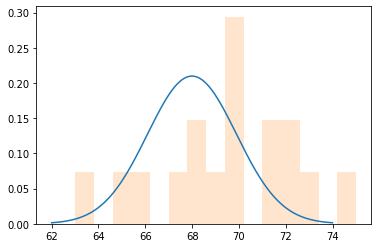

In [ ]:
xmin = 62.
xmax = 74.
x = np.arange(xmin, xmax, 0.01)
prob = heightDist.pdf(x)

plt.plot(x, prob)
plt.hist(classHeights, density=True, bins = 15, histtype='stepfilled', alpha=0.2);


How likely is it that these measurements were drawn from the same distribution?

In [ ]:
print("Mean height in dataset = " + str(np.mean(heights)))
print("Mean height in class = " + str(np.mean(classHeights)))

print(" ")

print("Variance in heights in dataset = " + str(np.var(heights)))
print("Variance in heights in class = " + str(np.var(classHeights)))

Mean height in dataset = 67.99311359679999
Mean height in class = 69.41176470588235
 
Variance in heights in dataset = 3.6162374935681267
Variance in heights in class = 8.59515570934256


Can we normalize these measurements?

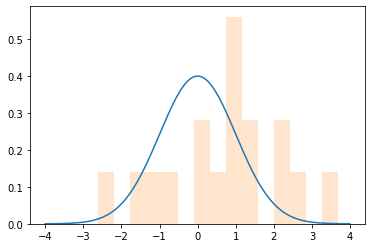

In [ ]:
normclassHeights = (classHeights-np.mean(heights))/np.std(heights)

xmin = -4.
xmax = 4.
x = np.arange(xmin, xmax, 0.01)

plt.plot(x, normDist.pdf(x))
plt.hist(normclassHeights, density=True, bins = 15, histtype='stepfilled', alpha=0.2);


Let's rigorously compare the means of the measurements in our reference dataset and the measurements we made in class?

In [ ]:
sampleMeanZ = np.mean(normclassHeights)

print("Z-scored mean height = " + str(sampleMeanZ))

Z-scored mean height = 0.7460142608924241


The mean of these measurements is well within the reference distribution of heights.

22.782940018493633% of distribution lies to the right of our measured mean


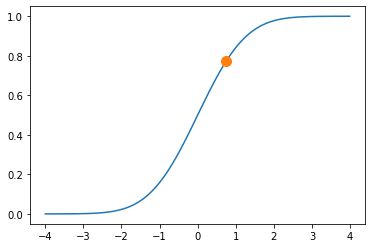

In [ ]:
normDistCdf = normDist.cdf(x)

plt.plot(x, normDistCdf);
plt.plot(sampleMeanZ, normDist.cdf(sampleMeanZ), '.', markersize=20);

print(str(100-normDist.cdf(sampleMeanZ)*100) + "% of distribution lies to the right of our measured mean")

Is this the right answer?  

NO!  

Why?  The distribution of our data (heights) is different than the distribution of means.

So what is the distribution of means?  Let's try to find out!

What would happen if we drew a random sample of size N from our reference distribution of heights and took the mean?

In [ ]:
randSampHeights = np.random.choice(heights, size=Nstudents, replace=False, p=None)
meanSampHeights = np.mean(randSampHeights)
meanSampHeightsZscore = (meanSampHeights - np.mean(heights))/np.std(heights)

print(meanSampHeights)
print(meanSampHeightsZscore)

67.91645705882354
-0.0403107361316355


What happens if we do this over and over?

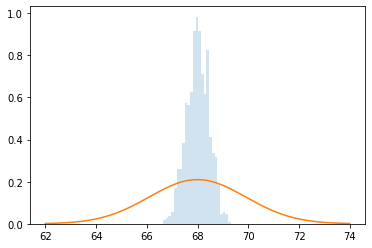

In [ ]:
Nsamp = 1000

xmin = 62.
xmax = 74.
x = np.arange(xmin, xmax, 0.01)

meanvals = np.zeros(Nsamp)
for i in range(0, Nsamp):
  vals = np.random.choice(heights, size=Nstudents, replace=False, p=None)
  meanvals[i] = np.mean(vals)

plt.hist(meanvals, density=True, bins = 25, histtype='stepfilled', alpha=0.2);
plt.plot(x, heightDist.pdf(x));


This is the central limit theorem in action!

To recall, if we calculate the mean of a sample of random variables


$\displaystyle {\bar {X}}_{n}\equiv {\frac {X_{1}+\cdots +X_{n}}{n}}$

What distribution does our sample mean follow?  A normal distribution with mean, ${\mu}$, and standard deviation, ${\frac{\sigma}{\sqrt {n}}}$!

The width of this distribution is the standard error of the measurement.


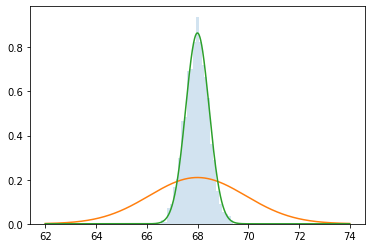

In [ ]:
meanHeightDist = stats.norm(np.mean(heights), np.std(heights)/np.sqrt(Nstudents))

Nsamp = 1000

xmin = 62.
xmax = 74.
x = np.arange(xmin, xmax, 0.01)

meanvals = np.zeros(Nsamp)
for i in range(0, Nsamp):
  vals = np.random.choice(heights, size=Nstudents, replace=False, p=None)
  meanvals[i] = np.mean(vals)

plt.hist(meanvals, density=True, bins = 25, histtype='stepfilled', alpha=0.2);
plt.plot(x, heightDist.pdf(x));
plt.plot(x, meanHeightDist.pdf(x));

OK!  Let's re-examine where our measurement falls in this new distribution - the expected distribution of sample means if we were to randomly sample N heights from our original reference distribution.

First, let's center this distribution


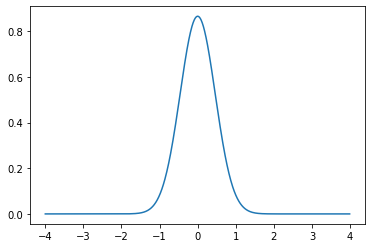

In [ ]:
meanHeightDist = stats.norm(0, np.std(heights)/np.sqrt(Nstudents))

xmin = -4.
xmax = 4.
x = np.arange(xmin, xmax, 0.01)

plt.plot(x, meanHeightDist.pdf(x));

Now let's see where our sample mean falls in this distribution.

Let's calculate a normalized mean

In [ ]:
sampleMeanZ = np.mean(normclassHeights)/(np.std(heights)/np.sqrt(Nstudents))

print("Z-scored mean height = " + str(sampleMeanZ))




Z-scored mean height = 1.617495637122773


3


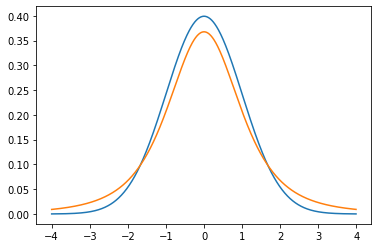

In [ ]:
df = np.size(classHeights)-1
print(df)
normtDist = stats.t(df)

plt.plot(x, normDist.pdf(x))
plt.plot(x, normtDist.pdf(x));

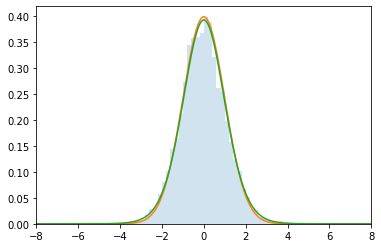

In [ ]:
Nsamp = 5000
normtDist = stats.t(df)

tvals = np.zeros(Nsamp)
for i in range(0, Nsamp):
  vals = np.random.choice(heights, size=Nstudents, replace=False, p=None)
  meanSampHeight = np.mean(vals)
  tvals[i] = (meanSampHeight-meanHeight)/(np.std(vals, ddof=1)/np.sqrt(Nstudents))

plt.hist(tvals, density=True, bins = np.arange(-8, 8, 0.2), histtype='stepfilled', alpha=0.2);
plt.plot(x, normDist.pdf(x))
plt.plot(x, normtDist.pdf(x))
plt.xlim(-8, 8);


In [ ]:

tstatistic = (np.mean(classHeights)-meanHeight)/(np.std(classHeights, ddof=1)/np.sqrt(Nstudents))

print(tstatistic)
p = normtDist.cdf(tstatistic)
print(1-p)

-4.0979280585759605
0.9995799008031252


In [ ]:
print(np.sum(tvals>tstatistic)/np.size(tvals))

0.9994


In [ ]:
t, p = stats.ttest_ind(classHeights, heights, equal_var=True, alternative='greater')
t, p = stats.ttest_1samp(classHeights, meanHeight, alternative='greater')
print(t)
print(p)

-4.09792805857596
0.9995799008031253


In [ ]:
xmin = 62.
xmax = 74.

df = np.size(classHeights)-1
sampDist = stats.t(df)

x = np.arange(xmin, xmax, 0.01)

In [ ]:
Nsamp = 1000;
meanHeight = np.zeros(Nsamp)

for i in range(0, Nsamp):
  sample = heightDist.rvs(size=Nstudents)
  meanHeight[i] = np.mean(sample)


In [ ]:
t_statistic = (np.mean(classHeights)-meanHeight)/(np.std(classHeights, ddof=1)/np.sqrt(Nstudents))


print("Mean Height = " + str(np.mean(classHeights)))
print("T statistic = " + str(t_statistic))

Mean Height = 69.66666666666667
T statistic = 2.272197920283331


17


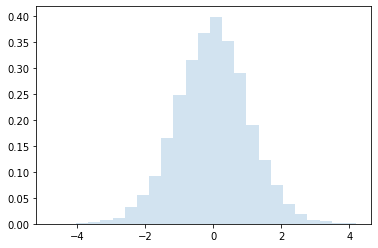

In [ ]:
df = np.size(classHeights)-1
print(df)
r = stats.t.rvs(df, size=10000)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, bins = 25, histtype='stepfilled', alpha=0.2)
plt.show()

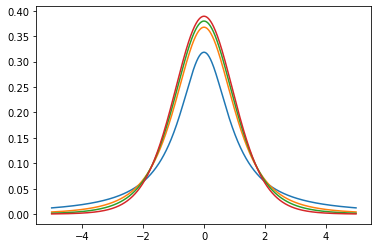

In [ ]:
xmin = -5.
xmax = 5.

x = np.arange(xmin, xmax, 0.01)
for i in np.array([1, 3, 5, 10]):
  prob = stats.t.pdf(x, i);
  plt.plot(x, prob)


In [ ]:
prob = stats.t.pdf(x, df);


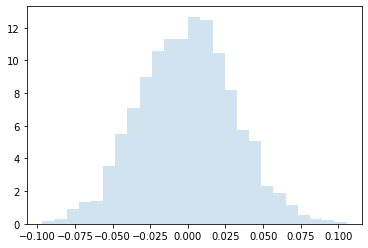

-0.0007908012214819211
0.0314386594720345


In [ ]:
iter = 2000

samp_mean = np.zeros(iter)
mu = 0
sigma = 1
tau = 1;
normdist = stats.norm(mu, sigma)
expdist = stats.expon(tau)

for i in range (0, iter):
   r1 = normdist.rvs(size=1000)
   samp_mean[i] = np.mean(r1)

fig, ax = plt.subplots(1, 1)
ax.hist(samp_mean, density=True, bins = 25, histtype='stepfilled', alpha=0.2)
plt.show()

samp_mean_mu = np.mean(samp_mean)
samp_mean_sigma = np.std(samp_mean)
print(samp_mean_mu)
print(samp_mean_sigma)

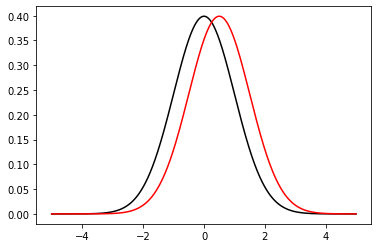

In [ ]:
xmin = -5.
xmax = 5.

x = np.arange(xmin, xmax, 0.01)
y1 = dist1.pdf(x)
y2 = dist2.pdf(x)

plt.plot(x, y1, 'k-');
plt.plot(x, y2, 'r-');


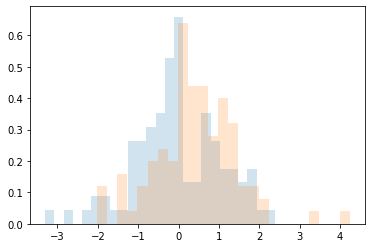

In [ ]:
r1 = dist1.rvs(size=100)
r2 = dist2.rvs(size=100)

fig, ax = plt.subplots(1, 1)
ax.hist(r1, density=True, bins = 25, histtype='stepfilled', alpha=0.2)
ax.hist(r2, density=True, bins = 25, histtype='stepfilled', alpha=0.2)
plt.show()

In [ ]:
m1 = print(np.mean(r1))
m2 = print(np.mean(r2))

-0.04332584038195598
0.4206012529016467


In [ ]:
t, p = stats.ttest_ind(r1, r2, equal_var=True, alternative='two-sided', trim=0)
print("t = " + str(t))
print("p = " + str(p))

t = -3.138234680361548
p = 0.0019593077646946435
